### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from os import listdir
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization
from keras import backend as K
from keras.models import load_model
from keras.models import Model
from keras.utils import img_to_array, load_img
from keras.utils import to_categorical
import tensorflow as tf

### Defining function to Visualize the Convolutional Layer


In [2]:
def visualize_conv_layers(model, img):
    layer_outputs = [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
    activation_model = Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(np.expand_dims(img, axis=0))
    layer = 1
    for layer_activation in activations:
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // 16
        display_grid = np.zeros((size * n_cols, 16 * size))
        for col in range(n_cols):
            for row in range(16):
                channel_image = layer_activation[0, :, :, col * 16 + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(f'Conv Layer {layer}')
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        layer = layer + 1 


### Creating the Custom model in order to Visualize the Conv layers

In [3]:
num_rows = 128
num_columns = 128
num_channels = 3
inputShape = (num_rows, num_columns, num_channels)
chanDim = -1
LR = 1e-3
BATCH_SIZE = 32
if K.image_data_format() == "channels_first":
    inputShape = (num_rows, num_columns, num_channels)
    chanDim = 1

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputShape))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid')) #in case of 5 class classification the activation function changes to 'softmax' and there are 5 outputs
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics=["accuracy"]) 
#in case of 5 class classification the loss function changes to 'categorical_crossentropy'


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

### Loading the random previously trained model for proper visualization
Here, the model is the Custom model trained for 5 class classification of fold 3 from 3 fold cross-validation

In [4]:
model = load_model(r"C:\Users\rudra\OneDrive\Desktop\animals\5_Class\model_5_class_fold3.h5")

1/1 [==============================] - 6s 6s/step


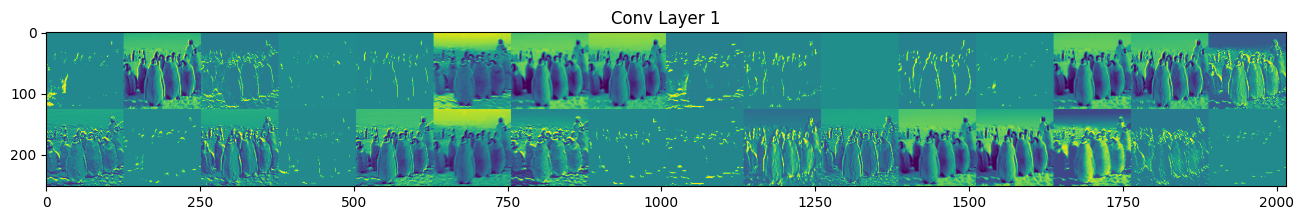

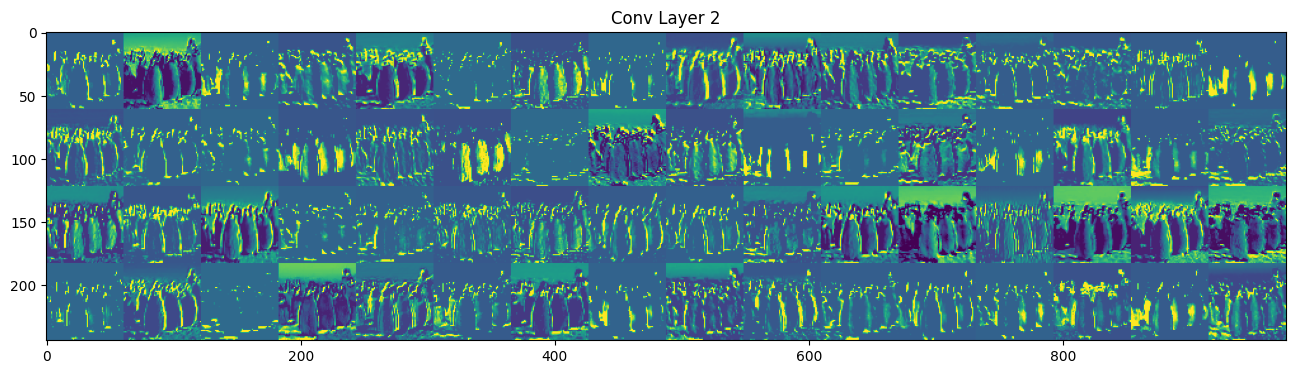

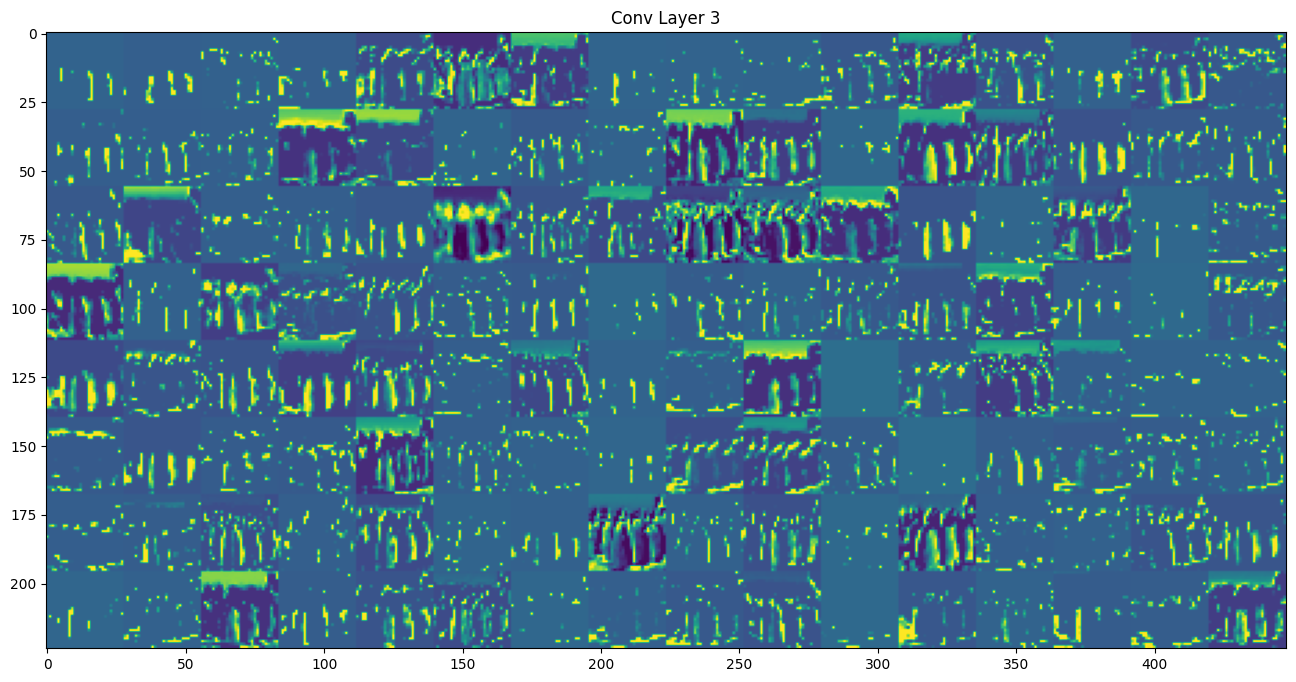

In [5]:
visualize_conv_layers(model,img_to_array(load_img(r"C:\Users\rudra\OneDrive\Desktop\animals\OvR3\antelope\rest\0a1f4371e3.jpg",target_size=(128,128)))/255)